In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential

In [2]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

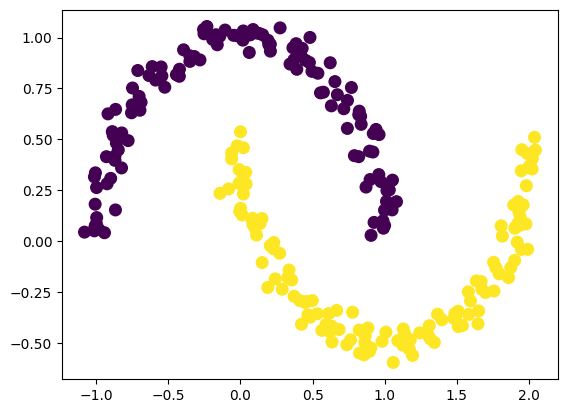

In [9]:
plt.scatter(X[:,0],X[:,1],c=y, s=70)

In [12]:
X[:5,:]

array([[ 0.0841541 ,  0.1133412 ],
       [ 1.05091536,  0.15471024],
       [-0.71655527,  0.67560789],
       [ 0.06093168,  0.92654234],
       [-1.0055248 ,  0.33642515]])

In [13]:
model = Sequential()

model.add(Dense(10, activation='sigmoid', input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
old_weights = model.get_weights()[0]

In [18]:
old_weights

array([[ 0.11016577, -0.42460942,  0.26300138,  0.02387923,  0.24326825,
         0.69578916, -0.38236126,  0.19083452,  0.55853504, -0.32560816],
       [-0.66410685,  0.21186143, -0.29036954,  0.263784  ,  0.02028173,
         0.5155962 , -0.52178675, -0.31096873,  0.16113466,  0.06941348]],
      dtype=float32)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model.fit(X_train, y_train,epochs=1)

7/7 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.4900


In [19]:
new_weights = model.get_weights()[0]
new_weights

array([[ 0.11016612, -0.42461842,  0.26300028,  0.02388221,  0.24324438,
         0.6957778 , -0.38235113,  0.19084051,  0.55852056, -0.3256065 ],
       [-0.6641071 ,  0.2118694 , -0.29036823,  0.26378205,  0.02030271,
         0.51560724, -0.52179575, -0.3109732 ,  0.16114907,  0.06941187]],
      dtype=float32)

In [20]:
model.optimizer.get_config()['learning_rate']

0.001

In [21]:
gradient = (old_weights - new_weights) / 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

gradient

array([[-0.00035018,  0.0090003 ,  0.00110269, -0.00298396,  0.02387166,
         0.01138449, -0.01013279, -0.00599027,  0.01448393, -0.00166893],
       [ 0.00023842, -0.00797212, -0.0013113 ,  0.00193715, -0.02097338,
        -0.01102686,  0.0090003 ,  0.00447035, -0.01440942,  0.00160933]],
      dtype=float32)

In [22]:
percent_change

array([[3.1786395e-04, 2.1196660e-03, 4.1927001e-04, 1.2496037e-02,
        9.8128961e-03, 1.6361978e-03, 2.6500565e-03, 3.1389848e-03,
        2.5931997e-03, 5.1255780e-04],
       [3.5900637e-05, 3.7628941e-03, 4.5159771e-04, 7.3437020e-04,
        1.0341022e-01, 2.1386619e-03, 1.7249003e-03, 1.4375556e-03,
        8.9424727e-03, 2.3184624e-03]], dtype=float32)

### You can see that the change in weights is so small that it's baerly significant.